# Back Order Data Classification

## Importing the libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv("BackorderData.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1407727,0,2.0,0,2,2,2,0,0,0,...,0,0.63,0.72,0,Yes,No,No,Yes,No,No
1048571,1407728,359,2.0,176,224,504,840,116,195,200,...,0,0.92,0.84,0,Yes,No,No,Yes,No,No
1048572,1407730,0,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1048573,1407731,0,2.0,0,12,12,12,0,0,0,...,0,0.24,0.28,0,No,No,No,No,No,No


# Exploratory Data Analysis

### Checking the Null Values

In [29]:
'''
-> Column lead_time hav 64518 rows having null values
   These number are large so we can remove the data as it may lost majority of data
-> We will also remove the SKU column as it will not contribute in the data due to its unique values
'''
print(df.isnull().sum())
df.drop(['sku'], axis=1,inplace=True)

sku                      0
national_inv             0
lead_time            64518
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64


In [30]:
'''
Most of the data have objects type
We will convert all those coulmn having dtype object to 0 1
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1048575 non-null  int64  
 1   lead_time          984057 non-null   float64
 2   in_transit_qty     1048575 non-null  int64  
 3   forecast_3_month   1048575 non-null  int64  
 4   forecast_6_month   1048575 non-null  int64  
 5   forecast_9_month   1048575 non-null  int64  
 6   sales_1_month      1048575 non-null  int64  
 7   sales_3_month      1048575 non-null  int64  
 8   sales_6_month      1048575 non-null  int64  
 9   sales_9_month      1048575 non-null  int64  
 10  min_bank           1048575 non-null  int64  
 11  potential_issue    1048575 non-null  object 
 12  pieces_past_due    1048575 non-null  int64  
 13  perf_6_month_avg   1048575 non-null  float64
 14  perf_12_month_avg  1048575 non-null  float64
 15  local_bo_qty       1048575 non-n

### Convert Yes/No data to 0 and 1

In [31]:
'''
This block of code will search for dtype equals to object
and than change it to 0 1 by labelencoder

Reset index will be use for comparing the value in next blocks
'''
le = LabelEncoder()
for e in df.columns:
    if(df[e].dtype=="object"):
        df[e] = le.fit_transform(df[e])
df.reset_index(inplace=True)

## Handling Null Values by linear regression

In [32]:
#initializing the linear regression
lr = LinearRegression()

#making a test and train here train will be the data having no null values and test is the data having null values
testdf = df[df['lead_time'].isnull()==True]
traindf = df[df['lead_time'].isnull()==False]

# Now making the features and labels
y = traindf['lead_time']
traindf.drop("lead_time",axis=1,inplace=True)

#Training the model and dropping the lead_team column to be predicted
lr.fit(traindf,y)
testdf.drop("lead_time",axis=1,inplace=True)

#Predicting the test dataset and assigning the new values to the column 
pred = lr.predict(testdf)
testdf['lead_time']= pred

/home/hassanrehman/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/hassanrehman/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_2376625/938574744.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [33]:
'''
Data is usually completely rounded so I round and concatenate the data to the original dataframe
'''
testdf['lead_time'] = testdf['lead_time'].apply(lambda x: round(x,0))
df = pd.concat([df,testdf],axis=0)

/tmp/ipykernel_2376625/2229249765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['lead_time'] = testdf['lead_time'].apply(lambda x: round(x,0))


In [34]:
'''
Now we will drop null values that we previously had
Also we will sort the data by index to get the data on original place
'''
X = df.dropna()
X = X.sort_values(by=['index'])
X.drop(['index'],axis=1, inplace=True) # We will remove the column as we dont require it now

In [35]:
'''
Convert the data into labels and feature
'''
y = X['went_on_backorder']
X = X.drop(['went_on_backorder'],axis=1)

### Feature Selection

In [36]:
selector = SelectKBest(f_classif, k = 'all')

X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
featuresSelected = names
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

           Feat_names    F_Scores
1           lead_time  512.503130
16          deck_risk  220.318678
11    potential_issue  196.196766
13   perf_6_month_avg  193.720987
14  perf_12_month_avg  193.134534
18          ppap_risk  110.813099
15       local_bo_qty  109.499544
17      oe_constraint   33.059448
2      in_transit_qty    7.790185
19      stop_auto_buy    4.688694
10           min_bank    4.540196
9       sales_9_month    4.144669
8       sales_6_month    4.023260
20           rev_stop    3.922369
7       sales_3_month    3.197978
0        national_inv    2.366397
6       sales_1_month    1.827979
5    forecast_9_month    1.292843
4    forecast_6_month    0.858675
12    pieces_past_due    0.140980
3    forecast_3_month    0.101148


<AxesSubplot:xlabel='F_Scores', ylabel='Feat_names'>

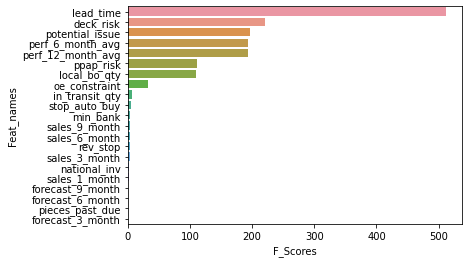

In [39]:
#bar chart of the above values
sns.barplot(x='F_Scores',y='Feat_names',data=ns_df_sorted )

### We will remove such columns having F-Score less than 1.5

In [40]:
dropped = ns_df_sorted[ns_df_sorted['F_Scores']<1.5]
dropped = list(dropped['Feat_names'])

X.drop(dropped, axis=1,inplace=True)

### Checking Class Imbalance

/home/hassanrehman/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

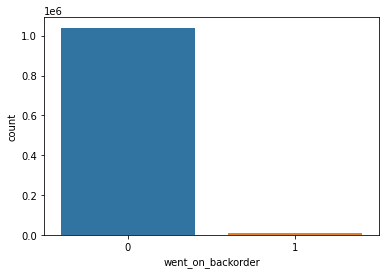

In [42]:
#As the class is highly imbalance so we will use upsampling method to up sample
#If we down sample the data to the target variable 0 much of the information will be lost
sns.countplot(y)

### Applying Upsampling technique to augment the data 

/home/hassanrehman/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

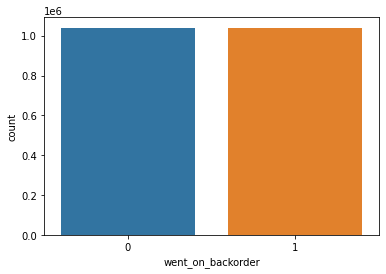

In [43]:
smote = SMOTE()
X, y = smote.fit_resample(X,y)
#After that the data is balanced perfectly
sns.countplot(y)

In [44]:
X

,national_inv,lead_time,in_transit_qty,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0,12.000000,0,0,0,0,0,0,0,-99.000000,-99.000000,0,0,0,0,1,0
1,2,9.000000,0,0,0,0,0,0,0,0.990000,0.990000,0,0,0,0,1,0
2,2,14.000000,0,0,0,0,0,0,0,-99.000000,-99.000000,0,1,0,0,1,0
3,7,8.000000,0,0,0,0,0,1,0,0.100000,0.130000,0,0,0,0,1,0
4,8,14.000000,0,0,0,0,4,2,0,-99.000000,-99.000000,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079345,4,8.000000,0,4,15,28,49,0,0,0.805768,0.817116,0,0,0,0,1,0
2079346,20,8.000000,8,101,307,609,964,101,0,0.620000,0.620000,6,1,0,0,1,0
2079347,2,8.000000,0,3,3,3,8,0,0,0.840000,0.890143,0,0,0,0,1,0
2079348,19,2.710608,0,17,25,27,27,5,0,0.433440,0.406076,0,1,0,0,1,0


# Training of the data

### Splitting and Scaling the data set

In [45]:
#Here we are splitting the data into training and testing data. Testing data is 20 percent where as training data is 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Architecture

In [46]:
from tensorflow import keras
model = keras.Sequential([
    #input shape is defined by number of feature
    #64 is the number of hidden layer 
    keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    #Last layer activation is sigmoid as there is only 0 or 1 output
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

2021-11-30 19:21:02.429171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-30 19:21:02.429195: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-30 19:21:02.429227: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP86): /proc/driver/nvidia/version does not exist
2021-11-30 19:21:02.429406: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Model Summary

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 3,641
Trainable params: 3,641
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [48]:
traces = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
51984/51984 [==============================] - 42s 806us/step - loss: 0.4467 - accuracy: 0.7813
Epoch 2/50
51984/51984 [==============================] - 41s 797us/step - loss: 0.3841 - accuracy: 0.8217
Epoch 3/50
51984/51984 [==============================] - 41s 797us/step - loss: 0.3650 - accuracy: 0.8328
Epoch 4/50
51984/51984 [==============================] - 41s 795us/step - loss: 0.3532 - accuracy: 0.8395
Epoch 5/50
51984/51984 [==============================] - 41s 796us/step - loss: 0.3452 - accuracy: 0.8443
Epoch 6/50
51984/51984 [==============================] - 41s 793us/step - loss: 0.3390 - accuracy: 0.8472
Epoch 7/50
51984/51984 [==============================] - 41s 796us/step - loss: 0.3335 - accuracy: 0.8511
Epoch 8/50
51984/51984 [==============================] - 41s 795us/step - loss: 0.3296 - accuracy: 0.8534
Epoch 9/50
51984/51984 [==============================] - 41s 794us/step - loss: 0.3256 - accuracy: 0.8557
Epoch 10/50
51984/51984 [============

### Testing Data Prediction

In [49]:
y_predicted = model.predict(X_test)
y_predicted = (y_predicted > 0.5)
y_predicted = [e[0] for e in y_predicted]
predicted_y = []
for e in y_predicted:
    if e:
        predicted_y.append(1)
    else:
        predicted_y.append(0)

### Accuracy and Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_matrix = confusion_matrix(y_test, y_predicted)
print(c_matrix)
accuracy_score(y_test, y_predicted)

[[180020  27935]
 [ 19850 188065]]


0.8850963041335033

## Conclusion

In [52]:
conclusion = '''
Training accuracy = 88%
Testing Accuracy = 88%

Which means model is trained well and is not overfitted and underfitted
'''
print(conclusion)


Training accuracy = 88%
Testing Accuracy = 88%

Which means model is trained well and is not overfitted and underfitted

